In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dataset = pd.read_csv('boston.csv',encoding="latin-1")

In [3]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
dataset.shape

(506, 14)

# In Data Analysis What All Things We Do 

### 1. Missing Value
### 2. Explore about the Numerical Variables
### 3. Explore about the Categorical Variables
### 4. Finding the RelationShip between features

In [7]:
# 1. Missing value
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
#1. Missing value Another way 
[features for features in dataset.columns if dataset[features].isnull().sum()>0]

[]

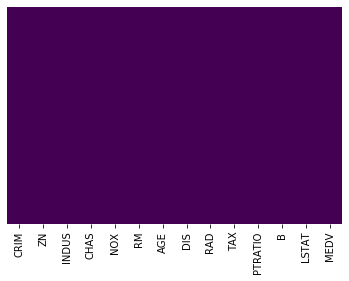

In [9]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
X = dataset.drop("MEDV",axis=1)
y = dataset["MEDV"]

In [11]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

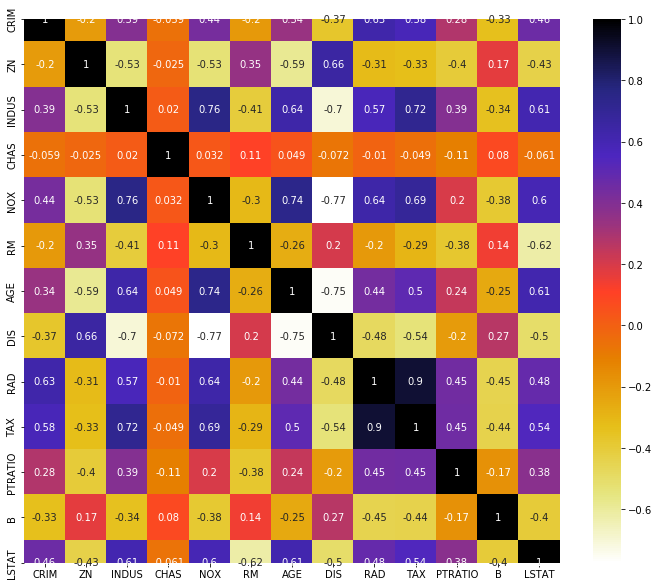

In [13]:
# Using pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [14]:
# with this function we can select the highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset,threshold):
    col_corr = set() # set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold: # we are interested in absolute coeff value
                colname=corr_matrix.columns[i] # getting the name of columns
                col_corr.add(colname)
    return col_corr

In [15]:
#to prevent over fitting we are not gonna do the same for the x_test

corr_features = correlation(X_train,0.7)
len(set(corr_features))

4

In [16]:
corr_features

{'AGE', 'DIS', 'NOX', 'TAX'}

In [17]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,CRIM,ZN,INDUS,CHAS,RM,RAD,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0,6.333,4,16.9,375.21,7.34
371,9.23230,0.0,18.10,0,6.216,24,20.2,366.15,9.53
219,0.11425,0.0,13.89,1,6.373,5,16.4,393.74,10.50
403,24.80170,0.0,18.10,0,5.349,24,20.2,396.90,19.77
78,0.05646,0.0,12.83,0,6.232,5,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...
56,0.02055,85.0,0.74,0,6.383,2,17.3,396.90,5.77
455,4.75237,0.0,18.10,0,6.525,24,20.2,50.92,18.13
60,0.14932,25.0,5.13,0,5.741,8,19.7,395.11,13.15
213,0.14052,0.0,10.59,0,6.375,4,18.6,385.81,9.38


In [25]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators=500,random_state=0)
reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [26]:
y_pred = reg.predict(X_test)

In [28]:
y_pred

array([24.0502, 29.1912, 21.9384, 11.0628, 20.849 , 20.6206, 21.2856,
       20.1116, 20.2892, 18.8068,  8.4008, 14.8674, 15.0992,  8.5304,
       46.9928, 34.0904, 21.1428, 34.537 , 25.5964, 20.9912, 23.7216,
       21.7922, 19.8228, 24.5316, 20.148 , 17.969 , 18.4892, 16.1796,
       43.8568, 19.1726, 14.908 , 17.5528, 20.0548, 21.5616, 22.9024,
       17.9   ,  8.6652, 28.9632, 14.6266, 15.4714, 22.8364, 20.9206,
       22.6108, 15.281 , 23.8676, 22.496 , 21.2108, 16.5242, 14.4464,
       25.2474, 16.2886, 19.7692, 22.065 , 39.4612, 15.0364, 21.0546,
       19.632 , 19.004 , 23.3234, 20.069 , 21.6072, 21.6144, 33.0452,
       27.852 , 18.5122, 27.0086, 16.07  , 21.2992, 17.1332, 22.0646,
       20.1064, 22.8378, 24.3566, 30.7666, 29.8062,  8.7144, 43.0154,
       22.5574, 22.9038, 20.1868, 26.5104, 18.1248, 23.797 , 42.819 ,
       42.0534, 24.3724, 22.8712, 15.0612, 26.4748, 16.1354, 19.1906,
       12.1192, 22.5064, 29.8266, 21.0106, 21.712 , 11.3222, 23.3902,
       14.8488, 19.0